
## 1. Data Preprocessing

Adjacency Matrix Shape: (4039, 4039)
[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


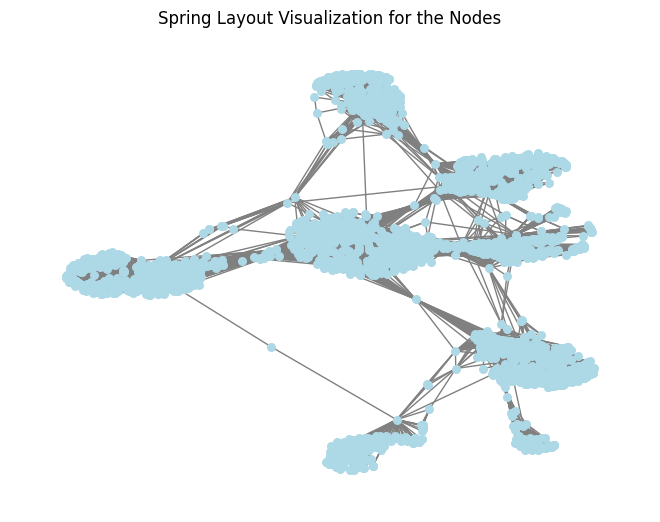

In [1]:
import os
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

# Load the data
edge_list_file = os.path.join(os.getcwd(), "SNAP_facebook/facebook_combined.txt")  # Path to your dataset
graph = nx.read_edgelist(edge_list_file, nodetype=int)

# Create adjacency matrix
adj_matrix = nx.adjacency_matrix(graph).toarray()

# Save or display the matrix
print("Adjacency Matrix Shape:", adj_matrix.shape)
print(adj_matrix)  # Or save to a file if needed


# Using spring layout
pos = nx.spring_layout(graph, seed=42)  # Seed for consistent layout
nx.draw(
    graph,
    pos,
    with_labels=False,
    node_size=30,
    node_color='lightblue',
    edge_color='gray'
)
plt.title("Spring Layout Visualization for the Nodes")
plt.show()

## 2. Classic Methods

### 2.1 Method 1: Eigenvector Centrality using Power Method

In [2]:
# find the eigenvector centrality using power method
def power_method(A, max_iter=100, tol=1e-6):
    n = A.shape[0]
    # Initialize eigenvector
    x = np.ones(n) / np.sqrt(n)

    for _ in range(max_iter):
        # Store previous eigenvector for convergence check
        x_old = x.copy()
        # Power iteration
        x = A @ x
        # Normalize
        x = x / np.linalg.norm(x)
        # Check convergence
        if np.allclose(x, x_old, rtol=tol):
            break

    return x

In [3]:
# Calculate eigenvector centrality
eigenvector_centrality = power_method(adj_matrix)

In [4]:
# Find top 10 nodes with highest eigenvector centrality
top_nodes_eigenvector_cen = np.argsort(eigenvector_centrality)[-10:]

# Print results for top 10 nodes
print("Top 10 nodes by eigenvector centrality:")
for node in reversed(top_nodes_eigenvector_cen):
    print(f"Node {node}: {eigenvector_centrality[node]:.6f}")


Top 10 nodes by eigenvector centrality:
Node 352: 0.095406
Node 2145: 0.086983
Node 3146: 0.086053
Node 3169: 0.085173
Node 3338: 0.084279
Node 3106: 0.084193
Node 3157: 0.084156
Node 3058: 0.084136
Node 3096: 0.083672
Node 3002: 0.083533


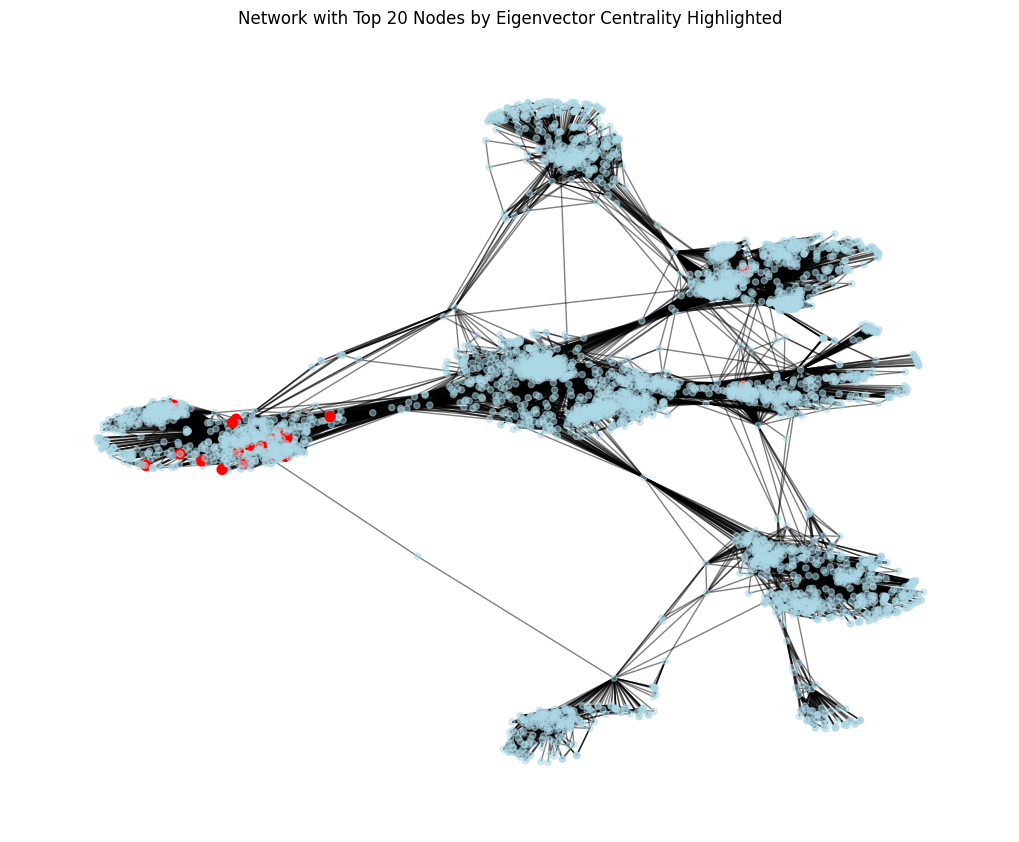

In [5]:
# Create visualization
top_nodes_viz = np.argsort(eigenvector_centrality)[-20:]

plt.figure(figsize=(10,8))
pos = nx.spring_layout(graph, seed=42)  # Seed for consistent layout
nx.draw(graph, pos,
        node_color=['red' if node in top_nodes_viz else 'lightblue' for node in graph.nodes()],
        node_size=[50 if node in top_nodes_viz else 20 for node in graph.nodes()],
        with_labels=False,
        alpha=[1.0 if node in top_nodes_viz else 0.5 for node in graph.nodes()])  # Add transparency

plt.title("Network with Top 20 Nodes by Eigenvector Centrality Highlighted")
plt.show()


### 2.2 Method 2: PageRank

In [6]:
# Calculate PageRank
pagerank = nx.pagerank(graph,alpha=0.85)

# Find top 10 nodes with highest PageRank
top_nodes_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]

# Print results for top 10 nodes
print("\nTop 10 nodes by PageRank:")
for node, score in top_nodes_pagerank:
    print(f"Node {node}: {score:.6f}")



Top 10 nodes by PageRank:
Node 3437: 0.007615
Node 107: 0.006936
Node 1684: 0.006367
Node 0: 0.006290
Node 1912: 0.003877
Node 348: 0.002348
Node 686: 0.002219
Node 3980: 0.002170
Node 414: 0.001800
Node 698: 0.001317


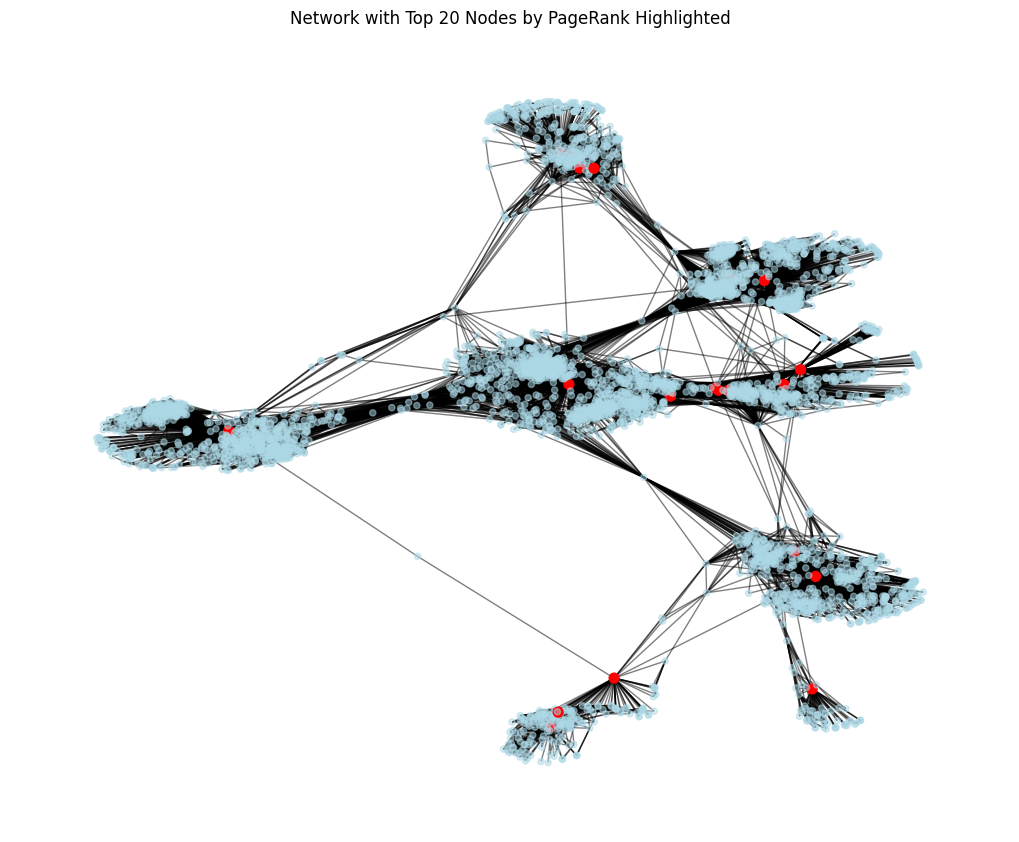

In [7]:
# Visualize top 20 nodes by PageRank
top_nodes_pagerank_viz = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:20]
top_nodes_pagerank_set = {node for node, _ in top_nodes_pagerank_viz}

plt.figure(figsize=(10,8))
nx.draw(graph, pos,
        node_color=['red' if node in top_nodes_pagerank_set else 'lightblue' for node in graph.nodes()],
        node_size=[50 if node in top_nodes_pagerank_set else 20 for node in graph.nodes()],
        with_labels=False,
        alpha=[1.0 if node in top_nodes_pagerank_set else 0.5 for node in graph.nodes()])

plt.title("Network with Top 20 Nodes by PageRank Highlighted")
plt.show()

In [8]:
# compare the two methods

li1 = list(np.argsort(eigenvector_centrality)[-100:])
li2 = list(node for node, _ in sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:100])
common_nodes = set(li1) & set(li2) # get the common nodes

print(li1)
print(li2)
print(common_nodes)


[np.int64(3423), np.int64(3084), np.int64(3467), np.int64(3250), np.int64(3136), np.int64(3203), np.int64(3336), np.int64(3141), np.int64(3260), np.int64(1490), np.int64(3097), np.int64(3478), np.int64(3268), np.int64(3025), np.int64(2989), np.int64(3104), np.int64(3401), np.int64(3032), np.int64(3461), np.int64(3270), np.int64(2984), np.int64(3034), np.int64(3382), np.int64(3253), np.int64(2994), np.int64(3295), np.int64(3071), np.int64(3273), np.int64(3241), np.int64(3283), np.int64(3437), np.int64(3252), np.int64(3360), np.int64(3103), np.int64(3197), np.int64(3365), np.int64(3236), np.int64(3079), np.int64(3234), np.int64(3299), np.int64(3080), np.int64(3133), np.int64(3449), np.int64(3048), np.int64(3310), np.int64(3200), np.int64(3411), np.int64(2167), np.int64(3209), np.int64(3433), np.int64(3457), np.int64(3456), np.int64(3238), np.int64(2976), np.int64(3024), np.int64(2944), np.int64(3125), np.int64(2962), np.int64(3091), np.int64(3438), np.int64(3110), np.int64(3235), np.int6

In [9]:
import pandas as pd

# Create DataFrames for scores
eigenvector_df = pd.DataFrame({
    'Node': range(len(eigenvector_centrality)),
    'Score': eigenvector_centrality,
    'Rank': (-eigenvector_centrality).argsort()
})

# Save to Excel files
eigenvector_df.to_excel('eigenvector_centrality_scores.xlsx', index=False)
print("saved")

# Get PageRank in sorted order
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
nodes, scores = zip(*sorted_pagerank)  # Unzip into separate lists

# Create DataFrame with correct ranking
pagerank_df = pd.DataFrame({
    'Node': nodes,
    'Score': scores,
    'Rank': range(len(nodes))  # This will give ranks 0 to n-1 in the correct order
})

# Save to Excel file
pagerank_df.to_excel('pagerank_scores.xlsx', index=False)

print("saved")


saved
saved


## 3. State Of Art - LeaderRank

### 3.1 Data Preprocessing

Adjacency Matrix Shape: (4039, 4039)
[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


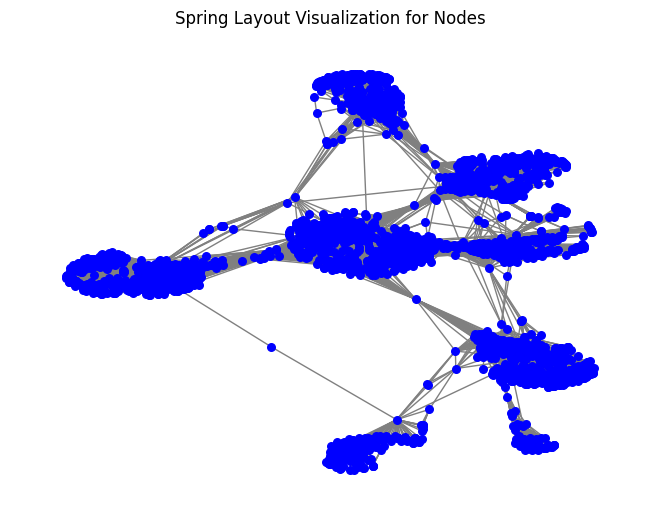

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

# Load the data
edge_list_file = os.path.join(os.getcwd(), "SNAP_facebook/facebook_combined.txt")  # Path to your dataset
graph = nx.read_edgelist(edge_list_file, nodetype=int)

# Create adjacency matrix
adj_matrix = nx.adjacency_matrix(graph).toarray()

# Save or display the matrix
print("Adjacency Matrix Shape:", adj_matrix.shape)
print(adj_matrix)  # Or save to a file if needed

sampled_nodes = list(graph.nodes)
sampled_subgraph = graph.subgraph(sampled_nodes)

# Using spring layout
pos = nx.spring_layout(sampled_subgraph, seed=42)  # Seed for consistent layout
nx.draw(
    sampled_subgraph,
    pos,
    with_labels=False,
    node_size=30,
    node_color='blue',
    edge_color='gray'
)
plt.title("Spring Layout Visualization for Nodes")
plt.show()

### 3.2 LeaderRank

In [11]:
def leader_rank_linear_algebra(adj_matrix, max_iter=100000, tol=1e-6):
    # Add a virtual supernode
    n = adj_matrix.shape[0]
    augmented_matrix = np.zeros((n + 1, n + 1))
    augmented_matrix[:n, :n] = adj_matrix
    
    # Connect the supernode to all other nodes with bidirectional links
    augmented_matrix[n, :n] = 1
    augmented_matrix[:n, n] = 1
    
    # Normalize the adjacency matrix to create a transition matrix
    degree = np.sum(augmented_matrix, axis=1)
    transition_matrix = augmented_matrix / degree[:, None]
    
    # Use power iteration to compute steady-state rank vector
    ranks = np.ones(n + 1) / (n + 1)  # Uniform initialization
    for iteration in range(max_iter):
        new_ranks = np.dot(transition_matrix.T, ranks)  # Linear algebra multiplication
        
        # Check for convergence
        if np.linalg.norm(new_ranks - ranks, 2) < tol:
            break
        
        ranks = new_ranks
    
    # Remove the supernode's rank and normalize remaining ranks
    final_ranks = ranks[:n] / np.sum(ranks[:n])
    
    return final_ranks

In [12]:
import numpy as np
import pandas as pd

# Load the adjacency matrix and node names from the provided Excel file
# file_path = 'Facebook_Data.xlsx'  

# # Read the Excel file
# data = pd.read_excel(file_path, header=0)

# # Extract node names (first column/row)
# node_names = data.columns[1:]  # Exclude the first column header
# adj_matrix = data.iloc[:, 1:].to_numpy()  # Extract the adjacency matrix as numpy array

# # Ensure the adjacency matrix is float
# adj_matrix = adj_matrix.astype(float)

# Run LeaderRank algorithm on the adjacency matrix
leader_scores = leader_rank_linear_algebra(adj_matrix)

# Combine the results into a single DataFrame
results_combined = pd.DataFrame({
    'LeaderRank Score': leader_scores
})

top_20_results = results_combined.sort_values(by='LeaderRank Score', ascending=False).head(20)
top_20_nodes_set = set(top_20_results.index)
# Display top 10 nodes
print("Top 20 nodes by LeaderRank Score:")
print(top_20_results)

Top 20 nodes by LeaderRank Score:
      LeaderRank Score
107           0.005806
351           0.004401
352           0.004176
1821          0.003039
0             0.001929
1490          0.001628
2154          0.001612
1373          0.001416
1285          0.001366
1149          0.001310
838           0.001305
2145          0.001297
366           0.001288
348           0.001276
1215          0.001260
2995          0.001242
2126          0.001237
3169          0.001230
917           0.001227
3106          0.001225


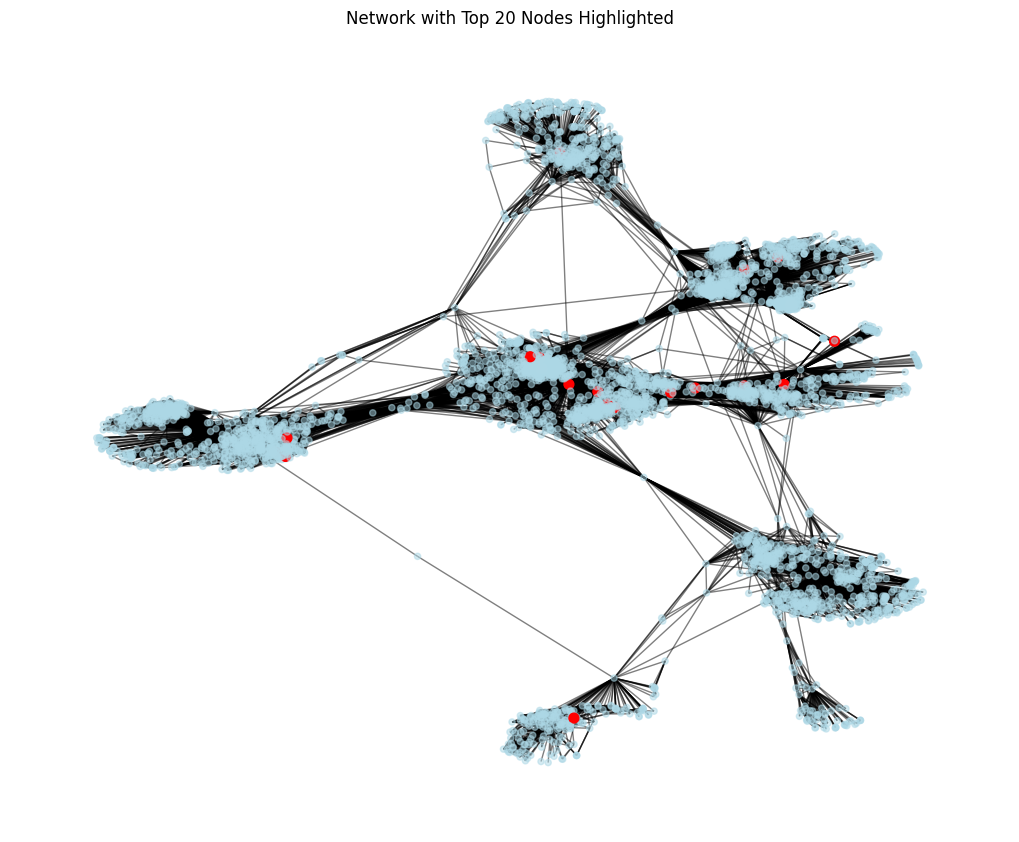

In [13]:
# Create a position dictionary for the entire graph
# Visualize the graph
top_nodes_viz = top_20_nodes_set

plt.figure(figsize=(10, 8))
nx.draw(
    graph,
    pos,
    node_color=['red' if node in top_nodes_viz else 'lightblue' for node in graph.nodes()],
    node_size=[50 if node in top_nodes_viz else 20 for node in graph.nodes()],
    with_labels=False,
    alpha=[1.0 if node in top_nodes_viz else 0.5 for node in graph.nodes()]
)
plt.title("Network with Top 20 Nodes Highlighted")
plt.show()

In [14]:
# Save results to an Excel file
output_file_path = 'LeaderRank_Scores.xlsx'  
results_combined.to_excel(output_file_path, index=False)

print(f"Results saved to {output_file_path}")

Results saved to LeaderRank_Scores.xlsx


## 4. Result Analysis

In [15]:
# !pip install openpyxl
import pandas as pd
import numpy as np

In [16]:
# Create Standardized Files


leader_rank_path = 'LeaderRank_Scores.xlsx'
page_rank_path = 'pagerank_scores.xlsx'
eigenvector_centrality_path = 'eigenvector_centrality_scores.xlsx'
leader_rank_df = pd.read_excel(leader_rank_path)
page_rank_df = pd.read_excel(page_rank_path)
eigenvector_centrality_df = pd.read_excel(eigenvector_centrality_path)

# Standardize LeaderRank by creating "Node" and "Rank" columns
# LeaderRank has scores in one column; extract "Node" from the row number (e.g., A2 -> 1)
leader_rank_df['Node'] = leader_rank_df.index
leader_rank_df = leader_rank_df.rename(columns={leader_rank_df.columns[0]: 'Score'})
leader_rank_df['Rank'] = leader_rank_df['Score'].rank(ascending=False).astype(int)
leader_rank_df = leader_rank_df[['Node', 'Rank', 'Score']].sort_values('Rank')

# Standardize PageRank by creating ranks
page_rank_df = page_rank_df.rename(columns={page_rank_df.columns[0]: 'Node', page_rank_df.columns[1]: 'Score'})
page_rank_df['Rank'] = page_rank_df['Score'].rank(ascending=False).astype(int)
page_rank_df = page_rank_df[['Node', 'Rank', 'Score']].sort_values('Rank')

# Standardize Eigenvector Centrality by creating ranks
eigenvector_centrality_df = eigenvector_centrality_df.rename(columns={
    eigenvector_centrality_df.columns[0]: 'Node', 
    eigenvector_centrality_df.columns[1]: 'Score'
})
eigenvector_centrality_df['Rank'] = eigenvector_centrality_df['Score'].rank(ascending=False).astype(int)
eigenvector_centrality_df = eigenvector_centrality_df[['Node', 'Rank', 'Score']].sort_values('Rank')

# Save
leader_rank_output_path = 'Standardized_LeaderRank.xlsx'
page_rank_output_path = 'Standardized_PageRank.xlsx'
eigenvector_centrality_output_path = 'Standardized_Eigenvector_Centrality.xlsx'

leader_rank_df.to_excel(leader_rank_output_path, index=False)
page_rank_df.to_excel(page_rank_output_path, index=False)
eigenvector_centrality_df.to_excel(eigenvector_centrality_output_path, index=False)

leader_rank_output_path, page_rank_output_path, eigenvector_centrality_output_path


('Standardized_LeaderRank.xlsx',
 'Standardized_PageRank.xlsx',
 'Standardized_Eigenvector_Centrality.xlsx')

### 4.1 Top 20 Most Influential Nodes (Based on Average Rank):

In [17]:
# Get Top 20 Most Influential Nodes (Based on Average Rank)

# Read the three standardized files
leader_df = pd.read_excel('Standardized_LeaderRank.xlsx', engine='openpyxl')
pagerank_df = pd.read_excel('Standardized_PageRank.xlsx', engine='openpyxl')
eigen_df = pd.read_excel('Standardized_Eigenvector_Centrality.xlsx', engine='openpyxl')

# Create a map from Node to Rank for each method
leader_map = dict(zip(leader_df['Node'], leader_df['Rank']))
pagerank_map = dict(zip(pagerank_df['Node'], pagerank_df['Rank']))
eigen_map = dict(zip(eigen_df['Node'], eigen_df['Rank']))

# Get all unique nodes
all_nodes = set(leader_df['Node']) | set(pagerank_df['Node']) | set(eigen_df['Node'])

# Create a DataFrame with ranks for each node
rankings = []
for node in all_nodes:
    rankings.append({
        'Node': node,
        'LeaderRank': leader_map.get(node, np.nan),
        'PageRank': pagerank_map.get(node, np.nan),
        'Eigenvector': eigen_map.get(node, np.nan)
    })

results_df = pd.DataFrame(rankings)

# Calculate average rank
results_df['Average_Rank'] = results_df[['LeaderRank', 'PageRank', 'Eigenvector']].mean(axis=1)

# Sort by average rank (lower is better since 1 is top rank)
top_nodes = results_df.nsmallest(20, 'Average_Rank')

# Print results
print("\nTop 20 Most Influential Nodes (Based on Average Rank):")
print("-" * 80)
print("Node    Average    LeaderRank    PageRank    Eigenvector")
print("         Rank")
print("-" * 80)
for _, row in top_nodes.iterrows():
    print(f"{int(row['Node']):4d}    {row['Average_Rank']:8.2f}    {int(row['LeaderRank']):10d}    {int(row['PageRank']):8d}    {int(row['Eigenvector']):10d}")

# Save detailed results
top_nodes.to_excel('Most_Influential_Nodes.xlsx', index=False)
print("\nDetailed results saved to 'Most_Influential_Nodes.xlsx'")

# Show consistency stats
print("\nNodes appearing in top 100 of all methods:")
top_100_leader = set(leader_df[leader_df['Rank'] <= 100]['Node'])
top_100_pagerank = set(pagerank_df[pagerank_df['Rank'] <= 100]['Node'])
top_100_eigen = set(eigen_df[eigen_df['Rank'] <= 100]['Node'])
consistent_top = top_100_leader & top_100_pagerank & top_100_eigen
print(f"Number of nodes: {len(consistent_top)}")
if len(consistent_top) > 0:
    print("Nodes:", sorted(list(consistent_top)))


Top 20 Most Influential Nodes (Based on Average Rank):
--------------------------------------------------------------------------------
Node    Average    LeaderRank    PageRank    Eigenvector
         Rank
--------------------------------------------------------------------------------
3101       36.67            46          43            21
3437       57.67           102           1            70
3002       81.00            34         199            10
2966      105.67            69         212            36
2944      106.33            73         201            45
3397      111.00           173          54           106
3051      118.67           147         100           109
3456      119.33            79         230            49
2126      142.67            17         233           178
3252      148.33           119         257            69
3360      149.67           115         266            68
3136      166.33           149         254            96
3449      170.00           

### 4.2 Kendall's Tau Correlation

In [18]:
# Kendall's Tau Correlation
from scipy import stats

# Read
eigenvector_df = pd.read_excel("Standardized_Eigenvector_Centrality.xlsx")
leaderrank_df = pd.read_excel("Standardized_LeaderRank.xlsx")
pagerank_df = pd.read_excel("Standardized_PageRank.xlsx")

# Create dictionaries mapping Node to Rank for each method
eigenvector_ranks = dict(zip(eigenvector_df['Node'], eigenvector_df['Rank']))
leaderrank_ranks = dict(zip(leaderrank_df['Node'], leaderrank_df['Rank']))
pagerank_ranks = dict(zip(pagerank_df['Node'], pagerank_df['Rank']))

# Get the common nodes across all three methods
common_nodes = set(eigenvector_ranks.keys()) & set(leaderrank_ranks.keys()) & set(pagerank_ranks.keys())

# Create lists of rankings in the same order for each method
eigenvector_ordered = [eigenvector_ranks[node] for node in common_nodes]
leaderrank_ordered = [leaderrank_ranks[node] for node in common_nodes]
pagerank_ordered = [pagerank_ranks[node] for node in common_nodes]

# Calculate Kendall's Tau between each pair
tau_eigen_leader, p_eigen_leader = stats.kendalltau(eigenvector_ordered, leaderrank_ordered)
tau_eigen_page, p_eigen_page = stats.kendalltau(eigenvector_ordered, pagerank_ordered)
tau_leader_page, p_leader_page = stats.kendalltau(leaderrank_ordered, pagerank_ordered)

# Print results
print("Kendall's Tau Correlation Results:")
print("-" * 50)
print(f"Eigenvector vs LeaderRank: {tau_eigen_leader:.4f} (p-value: {p_eigen_leader:.4e})")
print(f"Eigenvector vs PageRank: {tau_eigen_page:.4f} (p-value: {p_eigen_page:.4e})")
print(f"LeaderRank vs PageRank: {tau_leader_page:.4f} (p-value: {p_leader_page:.4e})")
print(f"\nNumber of nodes compared: {len(common_nodes)}")

Kendall's Tau Correlation Results:
--------------------------------------------------
Eigenvector vs LeaderRank: 0.3927 (p-value: 1.8121e-306)
Eigenvector vs PageRank: 0.0174 (p-value: 9.7435e-02)
LeaderRank vs PageRank: 0.0561 (p-value: 8.7935e-08)

Number of nodes compared: 4039
